## Linear Regression

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd 
#this is a magic funtion, in this case it will make your plot outputs appear and be stored within the notebook.
%matplotlib inline 

from sklearn.model_selection import train_test_split
from sklearn import linear_model 
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#supress some warnings that mess up my slides 
import warnings; warnings.simplefilter("ignore")

#Load data 
df = pd.read_csv("BostonHousing.csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [15]:
#get an overview of the DataFrame's structure 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [17]:
#display the number of missing (null or NaN) values in each column 
print(df.isnull().sum())

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


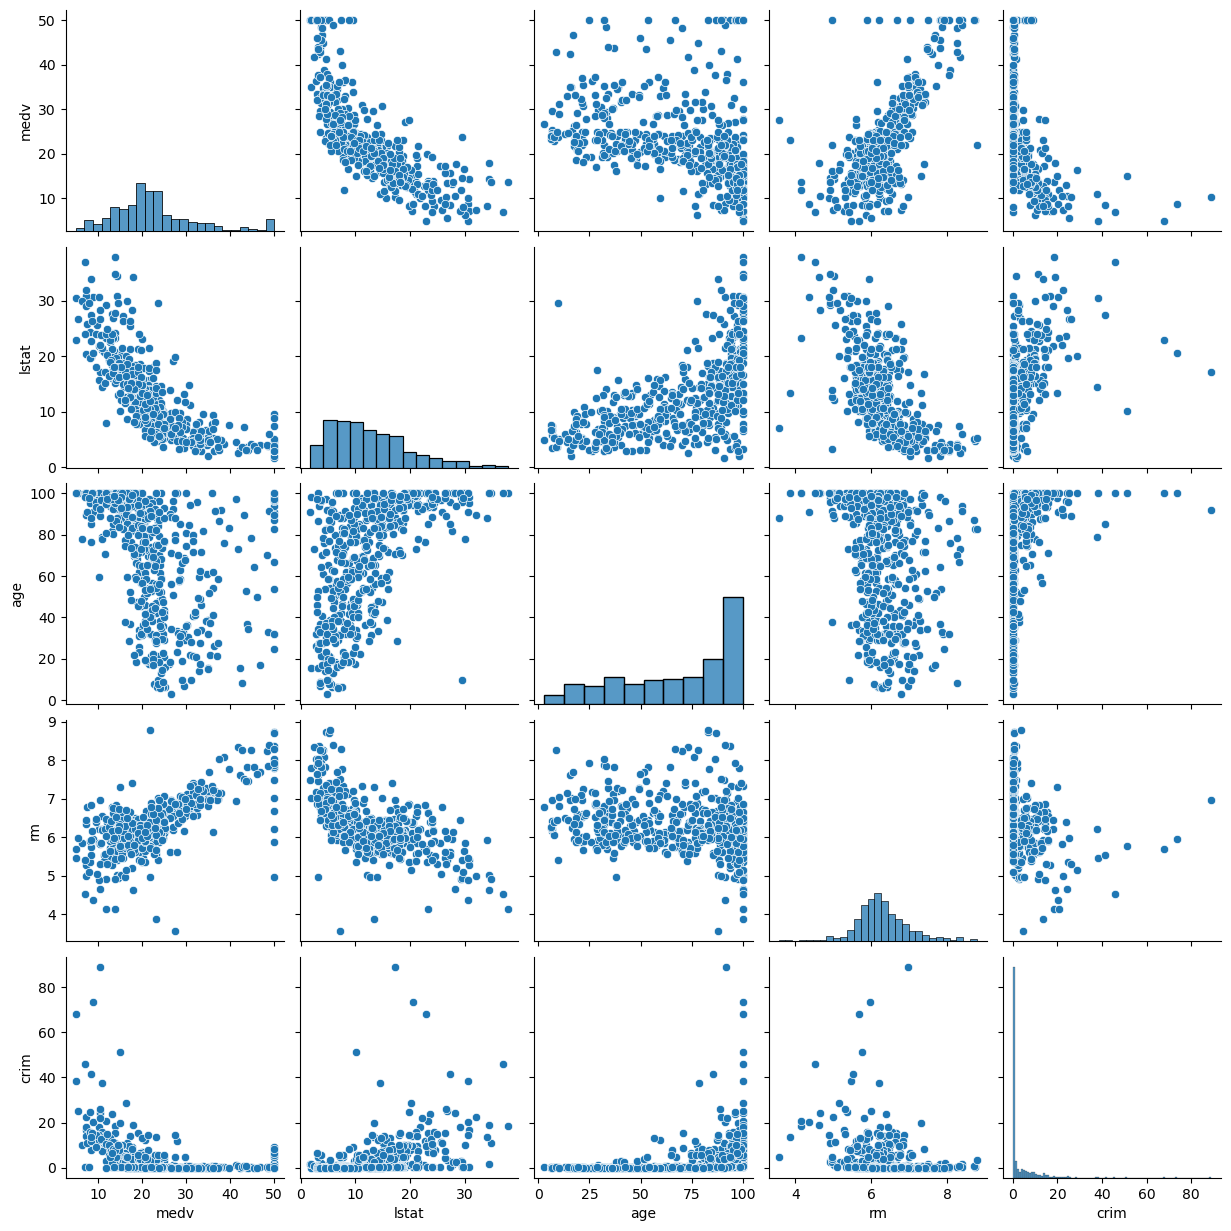

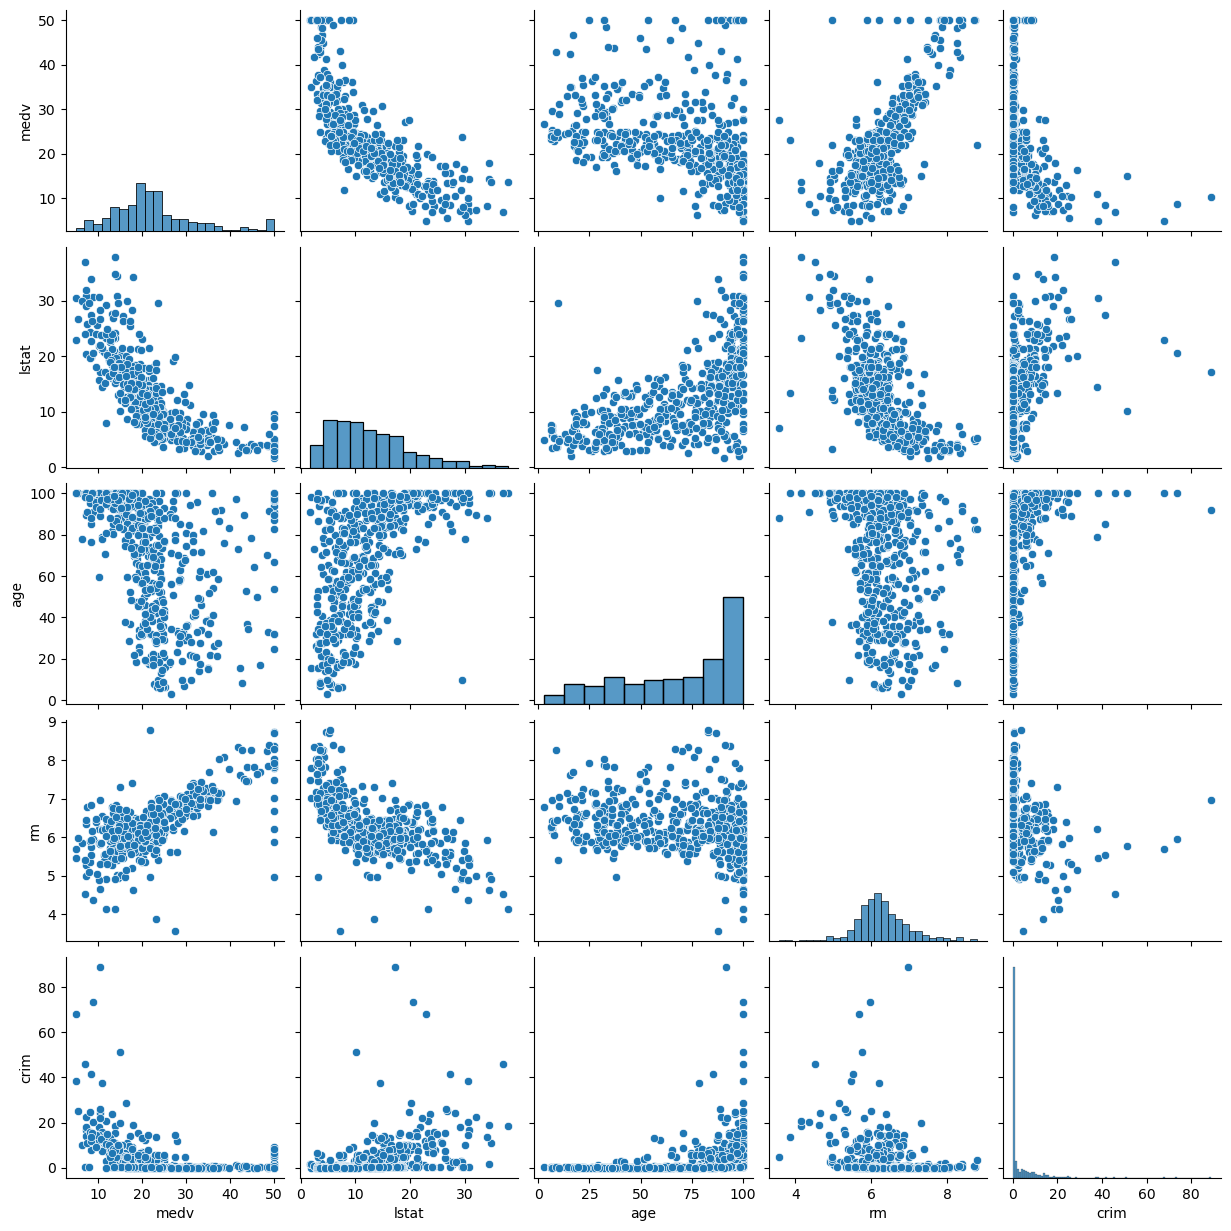

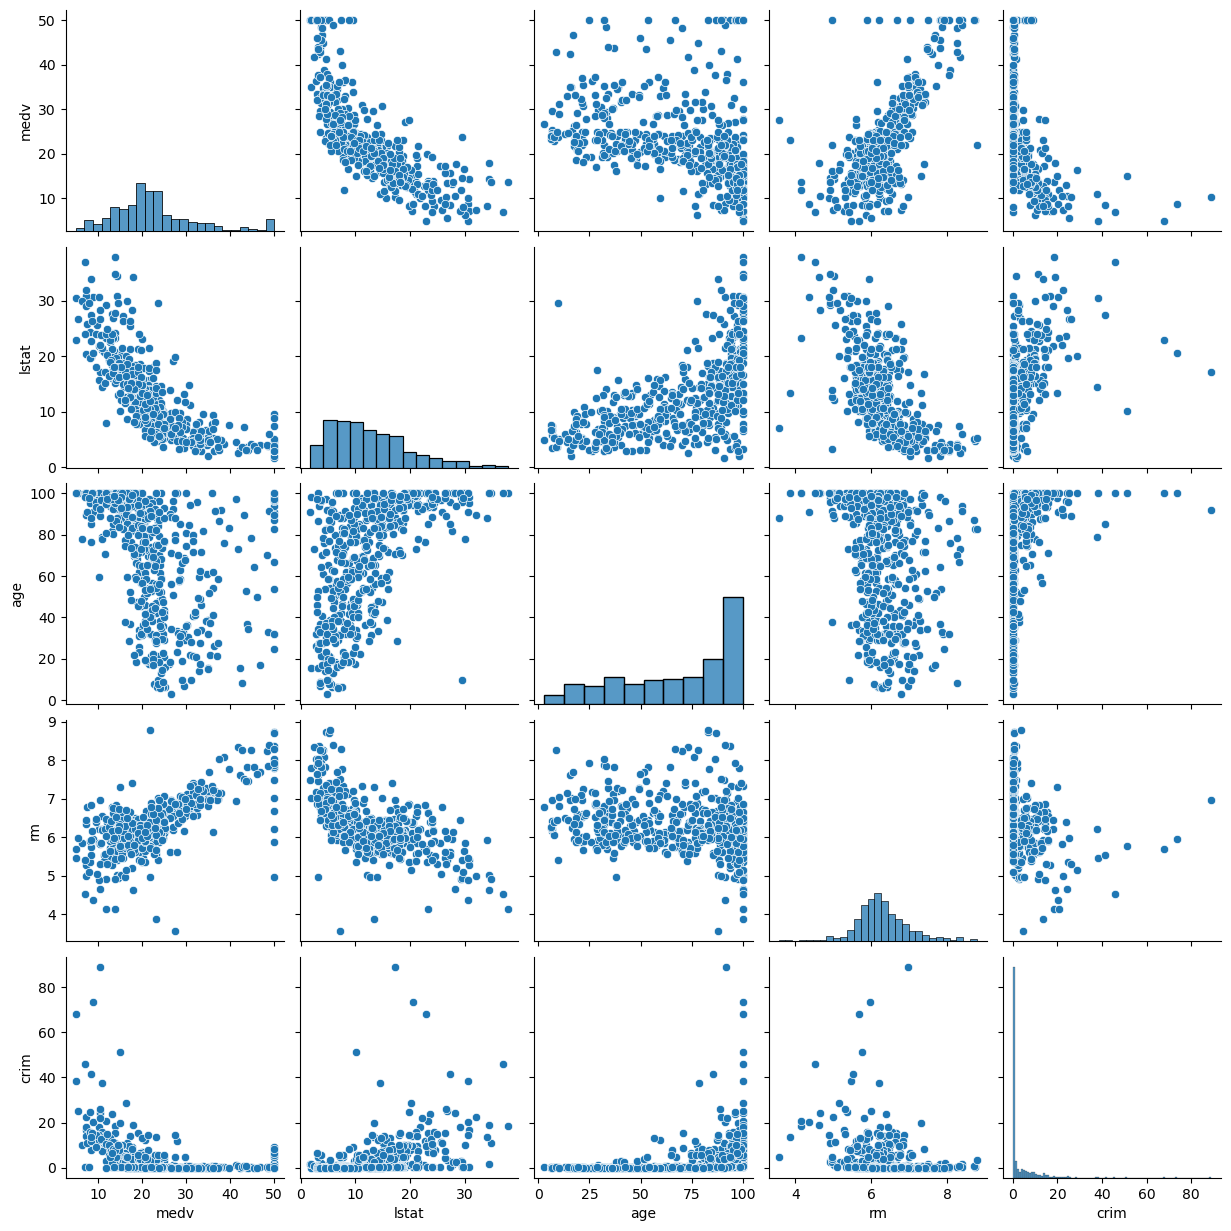

In [23]:
#creates a pair plot of the specified columns 
p = sns.pairplot(df[['medv', 'lstat', 'age', 'rm', 'crim']]) 
plt.show()

In [27]:
#Calculate the correlation matrix for the numerical columns 
corr = df.corr()
print(corr)

             crim        zn     indus      chas       nox        rm       age  \
crim     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
zn      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
indus    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
chas    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
nox      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
rm      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
age      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
dis     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
rad      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
tax      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
ptratio  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
b       -0.385064  0.175520 

In [33]:
#get the top 3 features that has the highest correlation 
print(df.corr().abs().nlargest(3, 'medv').index) 

#print the top 3 correlation values 
print(df.corr().abs().nlargest(3, 'medv').values[:,13]) 

Index(['medv', 'lstat', 'rm'], dtype='object')
[1.         0.73766273 0.69535995]


In [37]:
#Look at the correlation between medv and lstat
df[['medv','lstat']].corr()

,medv,lstat
medv,1.000000,-0.737663
lstat,-0.737663,1.000000


## Multiple Regression

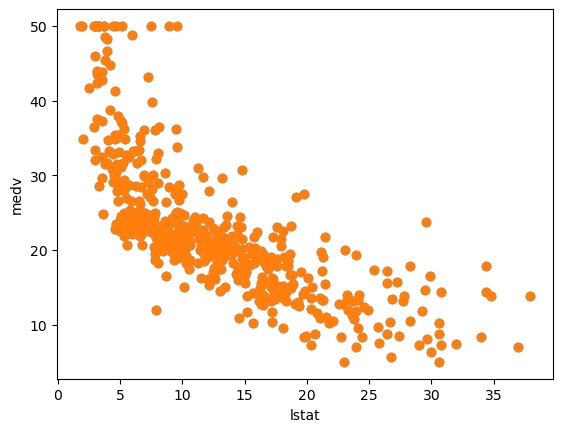

In [44]:
plt.scatter(df['lstat'],df['medv'], marker='o')
plt.xlabel('lstat')
plt.ylabel('medv')
plt.show()

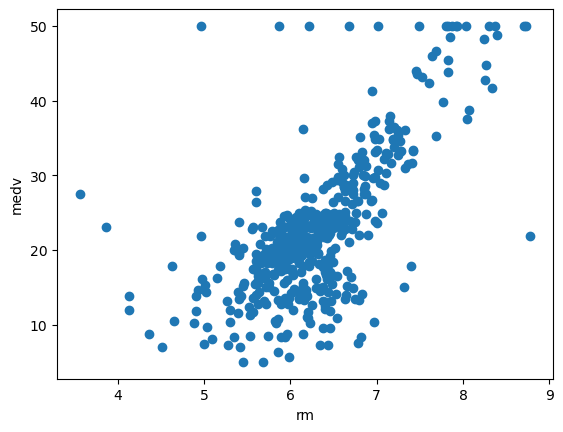

In [46]:
plt.scatter(df['rm'],df['medv'], marker='o')
plt.xlabel('rm')
plt.ylabel('medv')
plt.show()

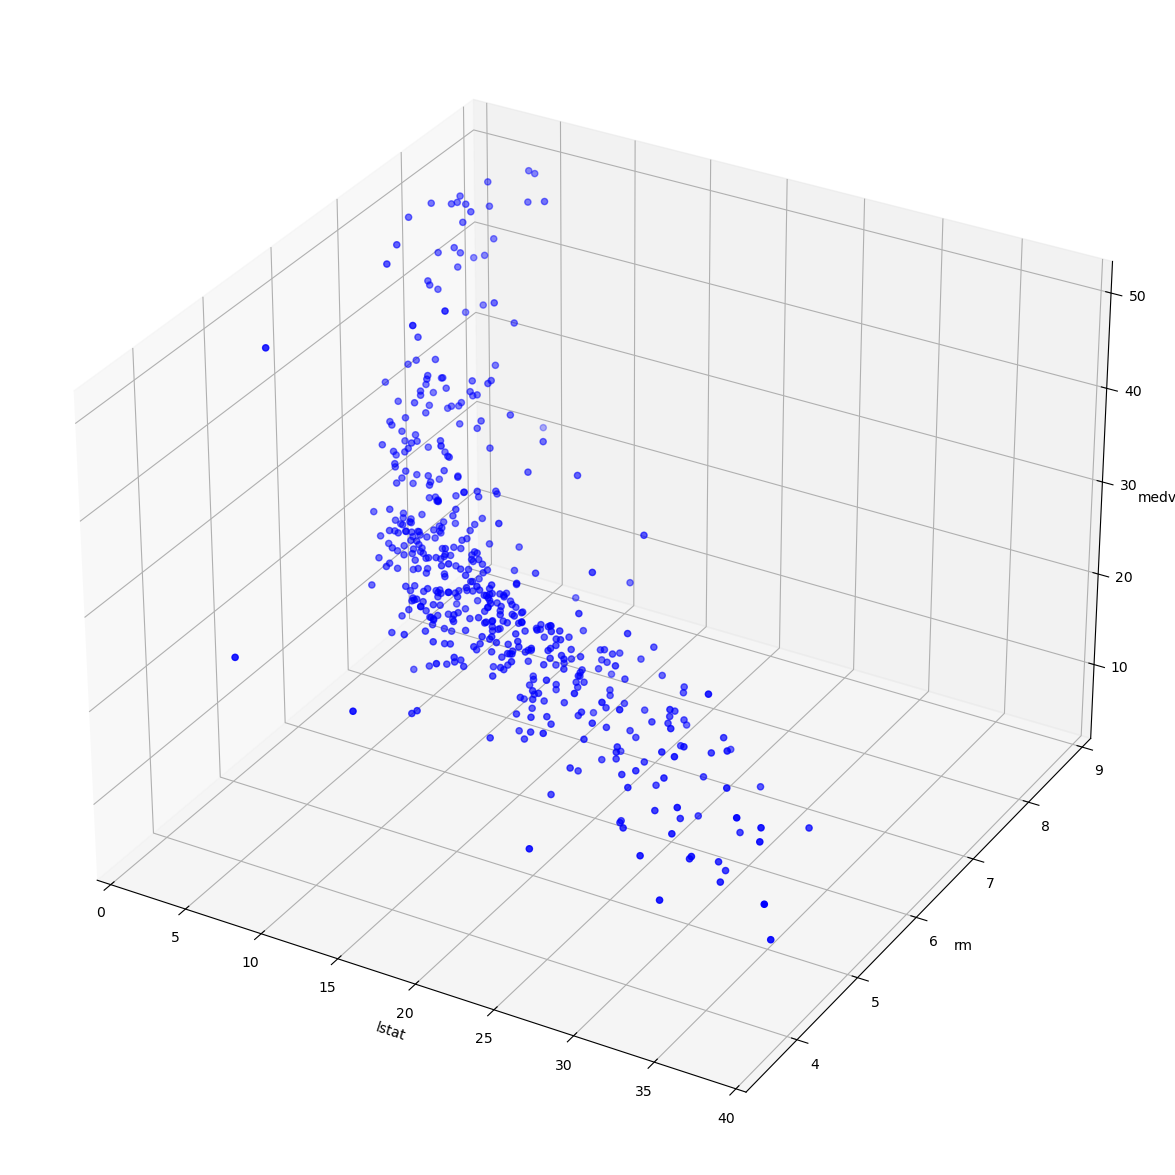

In [48]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(18,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['lstat'],
           df['rm'],
           df['medv'],
           c='b')
ax.set_xlabel("lstat")
ax.set_ylabel("rm")
ax.set_zlabel("medv")
plt.show()

### Training the Model 

In [61]:
import numpy as np 

x = pd.DataFrame(np.c_[df['lstat'], df['rm']], columns = ['lstat', 'rm'])
Y = df['medv']

#We will split the dataset into 70% for training and 30% for testing: 

from sklearn.model_selection import train_test_split
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.3,
                                                    random_state = 5)

#random_state=5 sets a seed for the random number generator, ensuring reproducibility. 

In [65]:
#After the split, let's print out the shape 0f the training set:
print(x_train.shape)
print(Y_train.shape)

#How many rows and columns does the x and Y training set have?

(354, 2)
(354,)


In [67]:
x_train.head()

,lstat,rm
445,23.98,6.459
428,21.52,6.193
481,7.74,6.750
55,4.81,7.249
488,18.06,5.454


In [69]:
Y_train.head()

445    11.8
428    11.0
481    23.7
55     35.4
488    15.2
Name: medv, dtype: float64

In [71]:
from sklearn.linear_model import LinearRegression 
model = LinearRegression()
model.fit(x_train, Y_train) 

LinearRegression()

In [73]:
#compare the model's predictions with the actual values 
price_pred = model.predict(x_test) 

#Cancatenate Y_test and price_pred 
result = np.column_stack((Y_test, price_pred))

#Print the aligned values
print(result)

[[37.6        37.1689804 ]
 [27.9        29.32035435]
 [22.6        25.58027087]
 [13.8         1.15646598]
 [35.2        33.20707082]
 [10.4         8.44197544]
 [23.9        30.37221305]
 [29.         27.57463198]
 [22.8        26.12976704]
 [23.2        22.01624296]
 [33.2        32.13551356]
 [19.         22.87944818]
 [20.3        22.66492916]
 [36.1        30.77766892]
 [24.4        26.87728603]
 [17.2        20.52649771]
 [17.9         0.07700859]
 [19.6        17.73715803]
 [19.7        12.4852138 ]
 [15.         21.5337132 ]
 [ 8.1         5.41730621]
 [23.         23.83920281]
 [44.8        37.59483142]
 [23.1        24.38880315]
 [32.2        29.45572317]
 [10.8        12.97936433]
 [23.1        26.66174451]
 [21.2        22.28532221]
 [22.2        27.15672582]
 [24.1        28.55285561]
 [17.3        11.92050914]
 [ 7.         10.73457063]
 [12.7        18.04609262]
 [17.8        25.06581211]
 [26.4        26.04950614]
 [19.6        22.86501105]
 [25.1        26.1328205 ]
 

In [75]:
#Once the model is trained, we will use the testing set to perfome some predictions: 
price_pred = model.predict(x_test) 
r_2 = model.score(x_test,Y_test)
mse = mean_squared_error(Y_test, price_pred)
mae = mean_absolute_error(Y_test, price_pred)

#how well does our model performe? Use tge R-squared method 
print(r_2)
print(mse)
print(mae)

0.6162026947666575
36.49422110915324
4.099595454703787
